G4 Interoperabilidade Novo

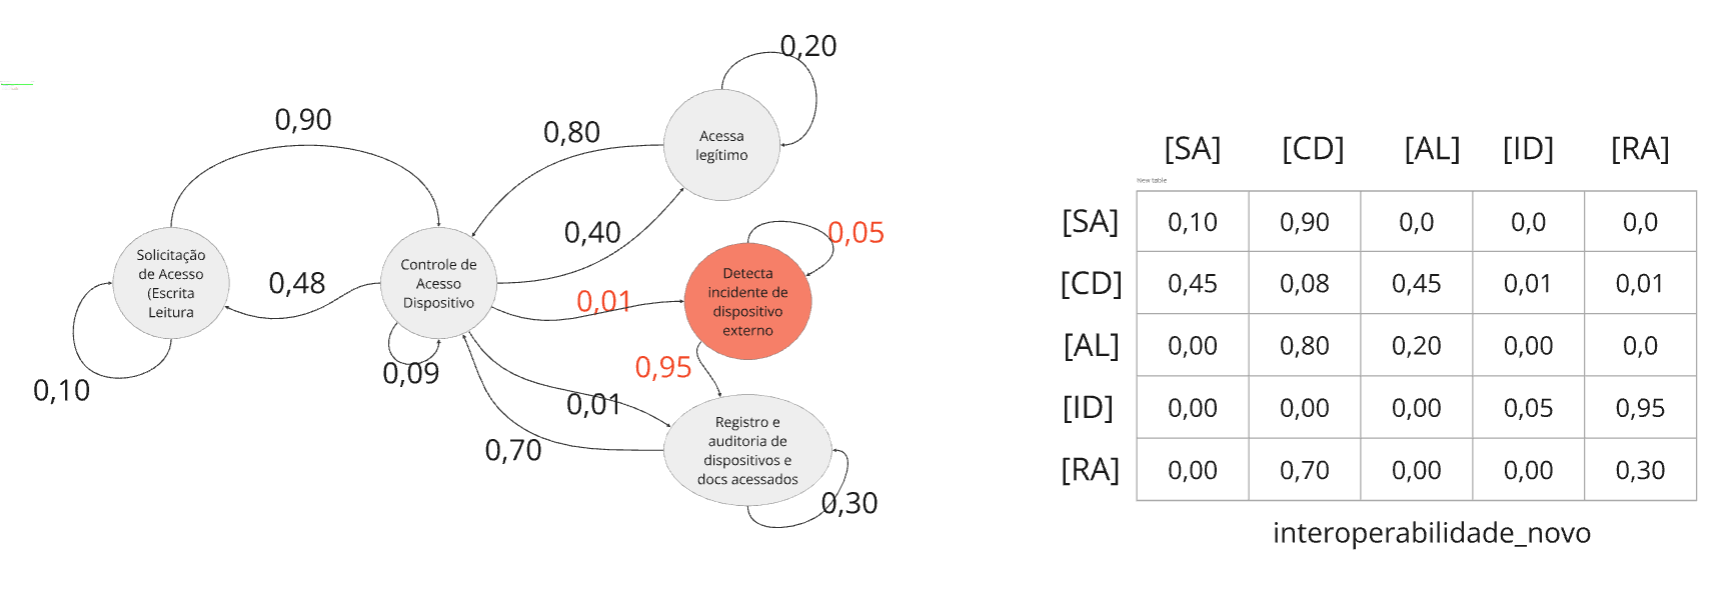

In [ ]:
import numpy as np
import random as rm
import datetime

# The statespace
states = ["SolicitacaoAcesso","ControleAcesso","AcessoLegitimo", "DeteccaoIncidenteDispositivoExterno", "RegistroAuditoriaDispositivos"]

# Possible sequences of events
transitionName = [["SASA", "SACD", "SAAL", "SAID", "SARA"], ["CDSA", "CDCD", "CDAL", "CDID", "CDRA"], ["ALSA", "ALCD", "ALAL", "ALID", "ALRA"], ["IDSA", "IDCD", "IDAL", "IDID", "IDRA"], ["RASA", "RACD", "RAAL", "RAID", "RARA"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.10, 0.90, 0.00, 0.00, 0.00], [0.45, 0.08, 0.45, 0.01, 0.01], [0.00, 0.80, 0.20, 0.00, 0.00], [0.00, 0.00, 0.00, 0.05, 0.95], [0.00, 0.70, 0.00, 0.00, 0.30]]

if (sum(transitionMatrix[0])+sum(transitionMatrix[1]) + sum(transitionMatrix[2]) + sum(transitionMatrix[3]) + sum(transitionMatrix[4])) != 5:
    print("Detectado um erro - talvez na matriz de probabilidades?")
else: print("Tudo certo. Vamos em frente. ", (datetime.datetime.now()+datetime.timedelta(hours=-3)), "!!")


Tudo certo. Vamos em frente.  2024-11-06 15:59:27.328914 !!



 G4: Simulação com Markov para Sistema Novo - Controle automatizado de Interoperabilidade  [ 2024-11-06 17:59:41.180179 ]
     >> Simulação quantidade de dias =  365
     >> Numero de acessos por dia    =  210



1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: 37.63 %
2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "ControleDispositivo" é de .........................: 19.59 %
3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoLegitimo" é de .............: 40.85 %
4. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "DeteccaoIncidenteDispositivoExterno" é de .....: 1.35 %
5. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "RegistroAuditoriaDispositivos" é de ............: 0.57 %




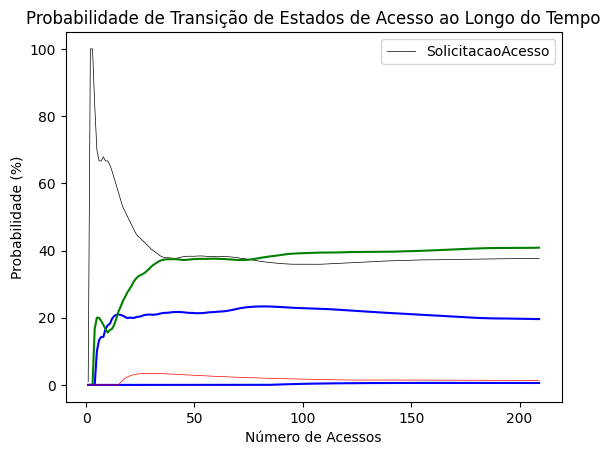

In [ ]:
import numpy as np
import random as rm
import datetime
import matplotlib.pyplot as plt

from types import EllipsisType

def activity_forecast(actions):
    # Choose the starting state
    activityAction = "SolicitacaoAcesso"
    activityList = [activityAction]
    i = 0
    prob = 1

    while i != actions:
        #Estado - SolicitacaoAcesso ["SASA", "SACD", "SAAL", "SAID", "SARA"] => [0.10, 0.90, 0.00, 0.00, 0.00]
        #print ("estado = ", activityAction)
        if activityAction == "SolicitacaoAcesso":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            #print ("change", change)
            if change == "SASA":
                prob = prob * 0.10
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "SACD":
                prob = prob * 0.90
                activityAction = "ControleAcesso"
                activityList.append("ControleAcesso")
            elif change == "SAAL":
                prob = prob * 0.00
                activityAction = "AcessoLegitimo"
                activityList.append("AcessoLegitimo")
            elif change == "SAID":
                prob = prob * 0.00
                activityAction = "DeteccaoIncidenteDispositivoExterno"
                activityList.append("DeteccaoIncidenteDispositivoExterno")
            else:
                prob = prob * 0.00
                activityAction = "RegistroAuditoriaDispositivos"
                activityList.append("RegistroAuditoriaDispositivos")

        #Estado - ControleAcesso ["CDSA", "CDCD", "CDAL", "CDID", "CDRA"] => [0.45, 0.08, 0.45, 0.01, 0.01]

        elif activityAction == "ControleAcesso":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            #print ("change", change)

            if change == "CDSA":
                prob = prob * 0.45
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "CDCD":
                prob = prob * 0.08
                activityAction = "ControleAcesso"
                activityList.append("ControleAcesso")
            elif change == "CDAL":
                prob = prob * 0.45
                activityAction = "AcessoLegitimo"
                activityList.append("AcessoLegitimo")
            elif change == "CDID":
                prob = prob * 0.01
                activityAction = "DeteccaoIncidenteDispositivoExterno"
                activityList.append("DeteccaoIncidenteDispositivoExterno")
            else:
                prob = prob * 0.01
                activityAction = "RegistroAuditoriaDispositivos"
                activityList.append("RegistroAuditoriaDispositivos")

        #Estado - AcessoLegitimo ["ALSA", "ALCD", "ALAL", "ALID", "ALRA"] =>  [0.00, 0.80, 0.20, 0.00, 0.00]

            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            #print ("change", change)

            if change == "ALSA":
                prob = prob * 0.00
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "ALCD":
                prob = prob * 0.80
                activityAction = "ControleAcesso"
                activityList.append("ControleAcesso")
            elif change == "ALAL":
                prob = prob * 0.20
                activityAction = "AcessoLegitimo"
                activityList.append("AcessoLegitimo")
            elif change == "ALID":
                prob = prob * 0.00
                activityAction = "DeteccaoIncidenteDispositivoExterno"
                activityList.append("DeteccaoIncidenteDispositivoExterno")
            else:
                prob = prob * 0.00
                activityAction = "RegistroAuditoriaDispositivos"
                activityList.append("RegistroAuditoriaDispositivos")

        #Estado - DeteccaoIncidenteDispositivoExterno ["IDSA", "IDCD", "IDAL", "IDID", "IDRA"] =>  [0.00, 0.00, 0.00, 0.05, 0.95]
        elif activityAction == "DeteccaoIncidenteInteroperabilidade":
            #change = np.random.choice(transitionName[3],replace=True,p=transitionMatrix[3])
            #print ("change", change)

            if change == "IDSA":
                prob = prob * 0.00
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "IDCD":
                prob = prob * 0.00
                activityAction = "ControleAcesso"
                activityList.append("ControleAcesso")
            elif change == "IDAL":
                prob = prob * 0.00
                activityAction = "AcessoLegitimo"
                activityList.append("AcessoLegitimo")
            elif change == "IDID":
                prob = prob * 0.05
                activityAction = "DeteccaoIncidenteDispositivoExterno"
                activityList.append("DeteccaoIncidenteDispositivoExterno")
            else:
                prob = prob * 0.95
                activityAction = "RegistroAuditoriaDispositivos"
                activityList.append("RegistroAuditoriaDispositivos")

        #Estado - RegistroAuditoriaDispositivos ["RASA", "RACD", "RAAL", "RAID", "RARA"] => [0.00, 0.70, 0.00, 0.0, 0.30]
        elif activityAction == "RegistroAuditoriaAfetados":
            #change = np.random.choice(transitionName[4],replace=True,p=transitionMatrix[4])
            #print ("change", change)

            if change == "RASA":
                prob = prob * 0.00
                activityAction = "SolicitacaoAcesso"
                activityList.append("SolicitacaoAcesso")
                pass
            elif change == "RACD":
                prob = prob * 0.70
                activityAction = "ControleDispositivo"
                activityList.append("ControleDispositivo")
            elif change == "RAAL":
                prob = prob * 0.00
                activityAction = "AcessoLegitimo"
                activityList.append("AcessoLegitimo")
            elif change == "RAID":
                prob = prob * 0.00
                activityAction = "DeteccaoIncidenteInteroperabilidade"
                activityList.append("DeteccaoIncidenteInteroperabilidade")
            else:
                prob = prob * 0.30
                activityAction = "RegistroAuditoriaAfetados"
                activityList.append("RegistroAuditoriaAfetados")
        i += 1

    return activityList

#
# Execução da simulação
#
list_activity = []
countSA = 0
countCD = 0
countAL = 0
countID = 0
countRA = 0

#Vetores de probabilidades e eixo X
eixoX = []
# Estados = ["SolicitacaoAcesso","ControleAcesso","AcessoLegitimo", "DeteccaoIncidenteDispositivoExterno", "RegistroAuditoriaDispositivos"]
probSolicitacaoAcesso = []
probControleAcesso = []
probAcessoLegitimo = []
probDeteccaoIncidenteDispositivoExterno = []
probRegistroAuditoriaDispositivos = []

probSolicitacaoAcesso.append (1.0)
probControleAcesso.append (0.0)
probAcessoLegitimo.append (0.0)
probDeteccaoIncidenteDispositivoExterno.append (0.0)
probRegistroAuditoriaDispositivos.append (0.0)

# Experimente Número de dias (Dias estimado/previsao - forecast) e de Acessos (Nactions)
Nactions = 210 # Cada dia dos 180 dias (210 acessos (35 pessoas, 6 acessos))
Ndias = 365  # Estimativa em dias (forecast)
# `Range` starts from the first count up until but excluding the last count

#para cálculo de probabilidade em cada predição (acumulado)
totalSimuladoPredicao = 0

iteracao = 1
for index in range(1, Nactions):
   eixoX.append(index)

datetime.timedelta (hours=-3);

print ("=============================================================================================================================================")
print ()
print (" G4: Simulação com Markov para Sistema Novo - Controle automatizado de Interoperabilidade  [", (datetime.datetime.now() + datetime.timedelta (hours=-3)), "]")
print ("     >> Simulação quantidade de dias = ", Ndias)
print ("     >> Numero de acessos por dia    = ", Nactions)
print ()
print ()
print ("=============================================================================================================================================")
print ()

list_activity = []

for iterations in range(1, Nactions):
    list_activity.append(activity_forecast(Ndias)) # Estimar Ndias
    #print (">> ", list_activity )
    # **** Cálculo do estado estável para este acesso do Nactions e com predição de Ndias forecast()
    #

    # Iterate through the list to get a count of all activities ending in state:'ServicoPrincipal'

    for smaller_list in list_activity:
        #print (">>", list_activity)
        #print ("++", smaller_list[0], smaller_list[1])
        if(smaller_list[2] == "SolicitacaoAcesso"):
            #print ("** run", countSA)
            countSA += 1
    #print ("countSA", countSA, totalSimuladoPredicao)

    # Iterate through the list to get a count of all activities ending in state:'AcessoManual'
    for smaller_list in list_activity:
        if(smaller_list[2] == "ControleAcesso"):
            countCD += 1
    #print ("countAM", countAM, totalSimuladoPredicao)

    # Iterate through the list to get a count of all activities ending in state:'IncidenteAcessoSemInteroperabilidade'
    for smaller_list in list_activity:
        if(smaller_list[2] == "AcessoLegitimo"):
            countAL += 1

    # Iterate through the list to get a count of all activities ending in state:'IncidenteAcessoSemInteroperabilidade'
    for smaller_list in list_activity:
        if(smaller_list[2] == "DeteccaoIncidenteDispositivoExterno"):
            countID += 1

    # Iterate through the list to get a count of all activities ending in state:'IncidenteAcessoSemInteroperabilidade'
    for smaller_list in list_activity:
        if(smaller_list[2] == "RegistroAuditoriaDispositivos"):
            countRA += 1

    totalSimuladoPredicao = countSA + countCD + countAL + countID + countRA
    #print (totalSimuladoPredicao, countSA, countCD, countAL, countID, countRA)

    # Calculate the probability of starting from state:'Sleep' and ending at state:'ServicoPrincipal'
    probSolicitacaoAcesso.append((countSA/totalSimuladoPredicao)*100.0)

    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'AcessoManual'
    probControleAcesso.append((countCD/totalSimuladoPredicao)*100.0)

    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'Incidente'
    probAcessoLegitimo.append((countAL/totalSimuladoPredicao)*100.0)

    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'Incidente'
    probDeteccaoIncidenteDispositivoExterno.append((countID/totalSimuladoPredicao)*100.0)

    # Calculate the probability of starting from state:'SolicitacaoAcesso' and ending at state:'Incidente'
    probRegistroAuditoriaDispositivos.append((countRA/totalSimuladoPredicao)*100.0)

    #
    # **** Fim cálculo  ****
    iteracao +=1

#Probabilidades Estados ["SolicitacaoAcesso","ControleDispositivo","AcessoLegitimo", "DeteccaoIncidenteInteroperabilidade", "RegistroAuditoriaAfetados"]

print(f'1. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "SolicitacaoAcesso" é de ......................: {probSolicitacaoAcesso[Nactions-1]:.2f} %')
print(f'2. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "ControleDispositivo" é de .........................: {probControleAcesso[Nactions-1]:.2f} %')
print(f'3. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "AcessoLegitimo" é de .............: {probAcessoLegitimo[Nactions-1]:.2f} %')
print(f'4. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "DeteccaoIncidenteDispositivoExterno" é de .....: {probDeteccaoIncidenteDispositivoExterno[Nactions-1]:.2f} %')
print(f'5. A probabilidade de iniciar no estado "SolicitacaoAcesso" e terminar no estado "RegistroAuditoriaDispositivos" é de ............: {probRegistroAuditoriaDispositivos[Nactions-1]:.2f} %')
print ()
print ()

plt.plot(eixoX[:Nactions-1], probSolicitacaoAcesso[:Nactions-1], color = 'black', linewidth = 0.5, label='SolicitacaoAcesso')
plt.plot(eixoX[:Nactions-1], probControleAcesso[:Nactions-1], color='blue')
plt.plot(eixoX[:Nactions-1], probAcessoLegitimo[:Nactions-1], color='green')
plt.plot(eixoX[:Nactions-1], probRegistroAuditoriaDispositivos[:Nactions-1], color='blue')
plt.plot(eixoX[:Nactions-1], probDeteccaoIncidenteDispositivoExterno[:Nactions-1], color='red', linewidth = 0.5)

# Configurações do gráfico
plt.title("Probabilidade de Transição de Estados de Acesso ao Longo do Tempo")
plt.xlabel("Número de Acessos")
plt.ylabel("Probabilidade (%)")
plt.legend()  # Adiciona a legenda
plt.show()

# Conclusão

Os resultados desta simulação de 365 dias para o novo sistema com controle automatizado de interoperabilidade mostram um avanço importante na segurança e na gestão de acessos autorizados. Cada estado avaliado contribui para uma análise abrangente sobre como o sistema se comporta ao controlar dispositivos que tentam acessar os dados. Vamos aos detalhes de cada estado, seguido de uma conclusão geral:

# Análise e Conclusão
1. Solicitação de Acesso Não Concluída (37.63%): A probabilidade de iniciar e terminar no estado "SolicitacaoAcesso" é de 37.63%, o que representa uma redução significativa em relação ao sistema anterior, que operava sem controle de interoperabilidade. Essa melhoria indica que o sistema é mais eficaz em encaminhar solicitações para estados subsequentes, reduzindo a ineficiência e a falta de conclusão nas solicitações de acesso.

2. Controle de Dispositivo (19.59%): A probabilidade de uma solicitação terminar no estado "ControleDispositivo" é de 19.59%. Esse valor indica que quase um quinto das solicitações passam pelo processo de verificação de dispositivo, o que garante que o sistema valide os dispositivos antes de conceder o acesso. Esse controle é essencial para melhorar a interoperabilidade e garantir que apenas dispositivos autorizados acessem os dados.

3. Acesso Legítimo (40.85%): Com 40.85% de probabilidade de concluir em "AcessoLegitimo", o sistema mostra que a maioria das solicitações são processadas com sucesso, permitindo o acesso de forma legítima. Esse resultado demonstra que o controle de interoperabilidade é eficaz em permitir acessos autorizados, promovendo uma integração segura com dispositivos e assegurando a integridade dos acessos.

4. Detecção de Incidente com Dispositivos Externos (1.35%): A probabilidade de um incidente envolvendo um dispositivo externo ocorrer é de 1.35%. Esse valor baixo indica que o sistema consegue mitigar com sucesso a maioria das tentativas de acesso não autorizado de dispositivos externos, o que é um avanço significativo em termos de segurança.

5. Registro em Auditoria de Dispositivos (0.57%): Com uma probabilidade de 0.57% de concluir no estado "RegistroAuditoriaDispositivos", o sistema demonstra que mantém um registro eficiente para auditoria e monitoramento. Esse recurso ajuda a rastrear incidentes e verificar a conformidade do uso de dispositivos, mesmo que a ocorrência de acessos indevidos seja baixa.

# Conclusão Final
A implementação do controle automatizado de interoperabilidade no sistema mostrou-se muito benéfica para melhorar o fluxo de acessos legítimos e garantir uma segurança elevada contra dispositivos não autorizados. A baixa taxa de incidentes e a alta probabilidade de concluir no estado "AcessoLegitimo" indicam que o sistema é bem-sucedido em validar dispositivos e, ao mesmo tempo, proteger dados sensíveis.

Esse controle automatizado reforça a interoperabilidade, permitindo que diferentes dispositivos acessem o sistema de forma segura e eficiente. Além disso, ele contribui para o monitoramento constante e a geração de registros, que auxiliam em auditorias e análises de conformidade. No geral, o sistema está mais resiliente e preparado para lidar com uma diversidade de dispositivos, minimizando riscos e maximizando a segurança e a eficiência operacional.